Import Libraries :

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load Data :

In [4]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Exploratory Data Analysis :

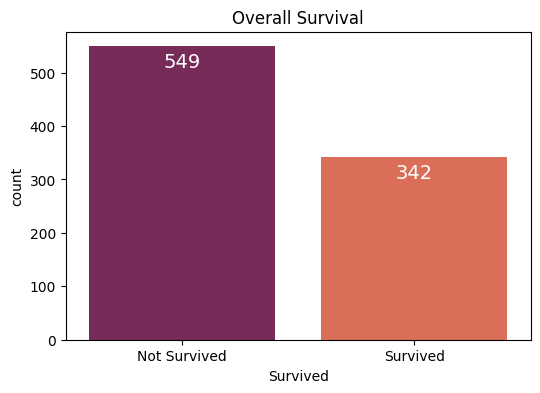

Survived
0    549
1    342
Name: count, dtype: int64

In [10]:
plt.figure(figsize=(6,4))
plot=sns.countplot(x='Survived', data=train_data,palette="rocket")
plt.title('Overall Survival')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'] )
labels = (train_data['Survived'].value_counts())
for i, v in enumerate(labels):
    plot.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w')
plt.show()
train_data['Survived'].value_counts()

Distribution of Passenger Class :

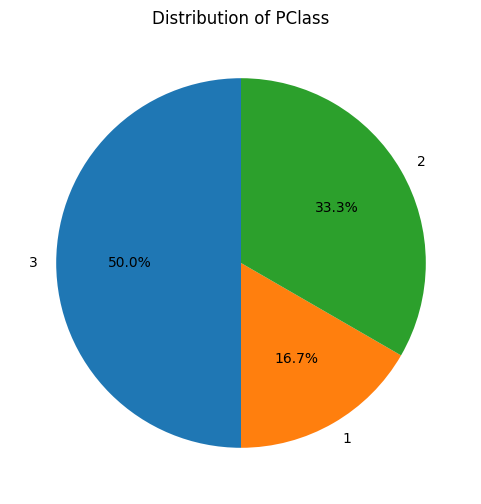

In [11]:
df_class = pd.DataFrame(train_data['Pclass'].value_counts()/len(train_data))

df_class['Pclass'] = df_class.index
plt.rcParams['figure.figsize'] = (6,6)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(df_class['Pclass'],
       labels=df_class['Pclass'],
       autopct="%1.1f%%",
       startangle=90)
plt.title("Distribution of PClass")
plt.show()

Sex Counts based on survival :

<Figure size 600x400 with 0 Axes>

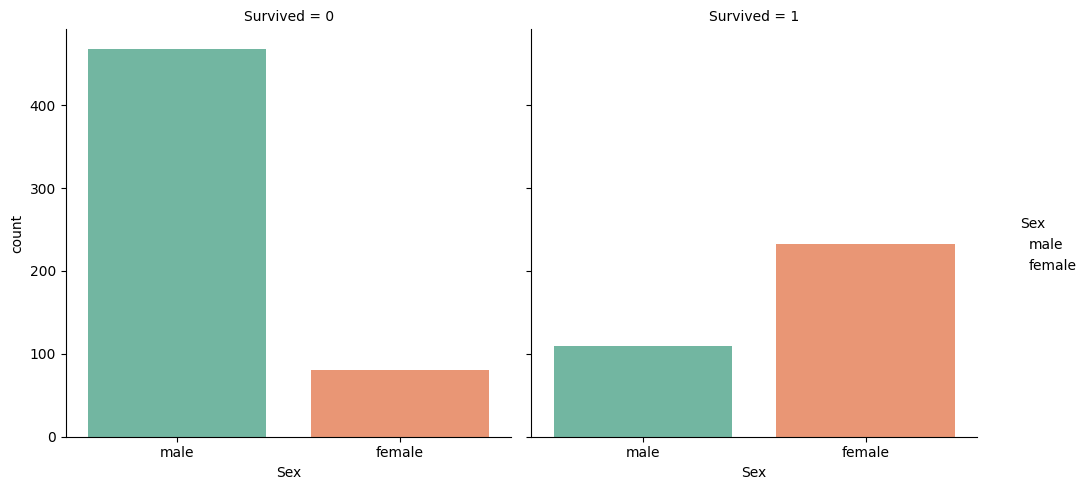

In [12]:
plt.figure(figsize=(6,4))
sns.catplot(x='Sex', col='Survived', kind='count', data=train_data, palette='Set2');

Distribution of Age :

<Axes: xlabel='Age', ylabel='Density'>

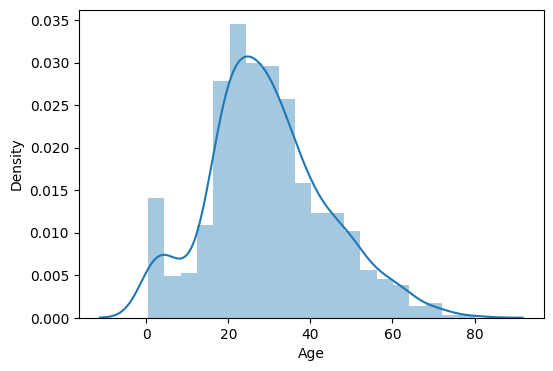

In [13]:
plt.figure(figsize=(6,4))
sns.distplot(train_data['Age'])

Counts of Siblings and Spouse of Passengers :

<Axes: xlabel='SibSp', ylabel='count'>

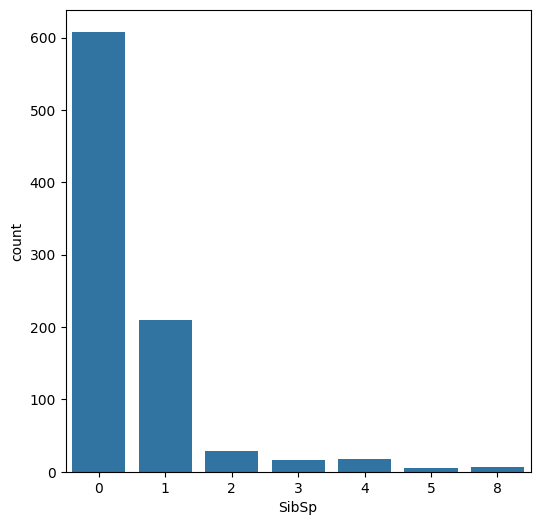

In [14]:
sns.countplot(x='SibSp',data=train_data)

Distribution of Ticket Fare :

<Axes: xlabel='Fare', ylabel='Density'>

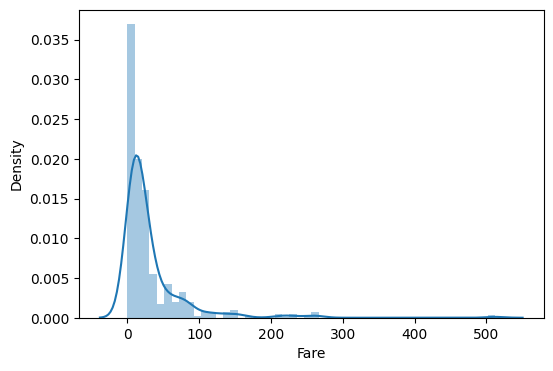

In [15]:
plt.figure(figsize=(6,4))
sns.distplot(train_data['Fare'])

Counts Passenger Based on Port Of Embarkation :

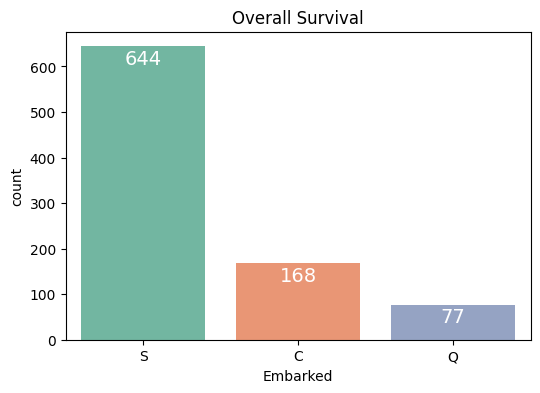

Survived
0    549
1    342
Name: count, dtype: int64

In [16]:
plt.figure(figsize=(6,4))
plot=sns.countplot(x='Embarked', data=train_data,palette="Set2")
plt.title('Overall Survival')
#plt.xticks( np.arange(2), ['Drowned', 'Survived'] )
labels = (train_data['Embarked'].value_counts())
for i, v in enumerate(labels):
    plot.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'w')
plt.show()
train_data['Survived'].value_counts()

Survival Counts of Ports of Embarkation :

<Axes: xlabel='Embarked', ylabel='count'>

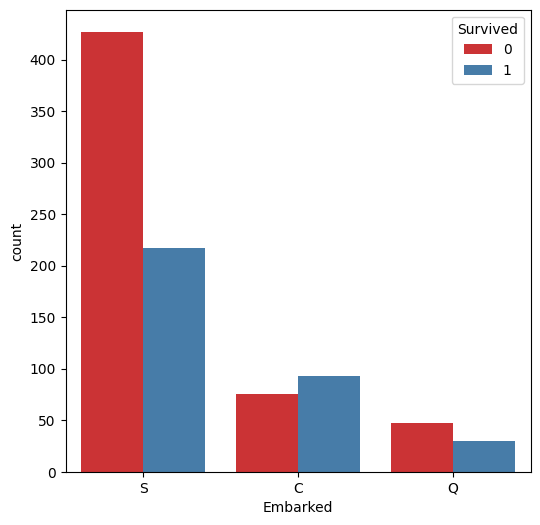

In [17]:
sns.countplot(x="Embarked", data=train_data,
              hue="Survived",palette="Set1",linewidth=0.2)

Data Preprocessing :

In [21]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop unnecessary columns :

In [23]:
train_data=train_data.drop(columns=['PassengerId','Name','Cabin','Ticket',],axis=1)

Label Encoding or categorical column :

In [24]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

In [25]:
print(train_data['Embarked'].mode()[0])

S


In [27]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [28]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
train_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
le = LabelEncoder()
train_data['Sex']= le.fit_transform(train_data['Sex'])

In [32]:
train_data['Sex'].value_counts()

Sex
1    577
0    314
Name: count, dtype: int64

In [33]:
embarked_dummies = pd.get_dummies(train_data['Embarked'])
train_data = pd.concat([train_data, embarked_dummies], axis=1)
train_data= train_data.drop(['Embarked'], axis=1)

In [34]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,False,False,True
1,1,1,0,38.000000,1,0,71.2833,True,False,False
2,1,3,0,26.000000,0,0,7.9250,False,False,True
3,1,1,0,35.000000,1,0,53.1000,False,False,True
4,0,3,1,35.000000,0,0,8.0500,False,False,True
5,0,3,1,29.699118,0,0,8.4583,False,True,False
6,0,1,1,54.000000,0,0,51.8625,False,False,True
7,0,3,1,2.000000,3,1,21.0750,False,False,True
8,1,3,0,27.000000,0,2,11.1333,False,False,True
9,1,2,0,14.000000,1,0,30.0708,True,False,False


In [35]:
train_data['Age']=train_data['Age'].astype(int)

In [36]:
train_data.to_csv('train_csv',index=False)

Split Data :

In [37]:
X = train_data.drop(columns =['Survived'] ,axis=1)
Y = train_data['Survived']

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,22,1,0,7.2500,False,False,True
1,1,0,38,1,0,71.2833,True,False,False
2,3,0,26,0,0,7.9250,False,False,True
3,1,0,35,1,0,53.1000,False,False,True
4,3,1,35,0,0,8.0500,False,False,True


In [39]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Split Data into Train and Test Data :

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


In [41]:
X.shape

(891, 9)

In [42]:
print( X_train.shape, X_test.shape)

(668, 9) (223, 9)


In [43]:
print( Y_train.shape, Y_test.shape)

(668,) (223,)


Model Building and Evaluation :

Logistic Regression :

In [44]:
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)
lr_y_pred=lr.predict(X_test)
print("Logistic Regression :")
print(classification_report(Y_test,lr_y_pred))
ac_lr=accuracy_score(Y_test, lr_y_pred)
print("Accuracy Score:",ac_lr)

Logistic Regression :
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       134
           1       0.77      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223

Accuracy Score: 0.8026905829596412


In [61]:
model_df = pd.DataFrame(columns=["Model Name","Accuracy Score"])
new_row = {"Model Name":"Logistic Regression", "Accuracy Score":ac_lr}
model_df = model_df._append(new_row, ignore_index=True)


Random Forest :

In [46]:
rf=RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=200)
rf.fit(X_train,Y_train)
rf_y_pred=rf.predict(X_test)
print("Random Forest :")
print(classification_report(Y_test,rf_y_pred))
ac_rf=accuracy_score(Y_test,rf_y_pred)
print("Accuracy Score:",ac_rf)

Random Forest :
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       134
           1       0.78      0.72      0.75        89

    accuracy                           0.81       223
   macro avg       0.80      0.79      0.80       223
weighted avg       0.81      0.81      0.81       223

Accuracy Score: 0.8071748878923767


In [62]:
new_row = {"Model Name":"Random Forest", "Accuracy Score":ac_rf}
model_df = model_df._append(new_row, ignore_index=True)

Decision Tree :

In [49]:
dt=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(X_train,Y_train)
dt_y_pred=dt.predict(X_test)
print("Decision Tree:")
print(classification_report(Y_test,dt_y_pred))
ac_dt=accuracy_score(Y_test,dt_y_pred)
print("Accuracy Score:",ac_dt)

Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       134
           1       0.72      0.62      0.67        89

    accuracy                           0.75       223
   macro avg       0.75      0.73      0.74       223
weighted avg       0.75      0.75      0.75       223

Accuracy Score: 0.7533632286995515


In [63]:
new_row = {"Model Name":"Decision Tree", "Accuracy Score":ac_dt}
model_df = model_df._append(new_row, ignore_index=True)
     

XGBoost :

In [50]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
xgb_y_pred=xgb.predict(X_test)
print("XGB Classifier:")
print(classification_report(Y_test,xgb_y_pred))
ac_xgb=accuracy_score(Y_test,xgb_y_pred)
print("Accuracy Score:",ac_xgb)

XGB Classifier:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       134
           1       0.74      0.75      0.74        89

    accuracy                           0.79       223
   macro avg       0.78      0.79      0.79       223
weighted avg       0.79      0.79      0.79       223

Accuracy Score: 0.7937219730941704


In [64]:
new_row = {"Model Name":"XGB", "Accuracy Score":ac_xgb}
model_df = model_df._append(new_row, ignore_index=True)
     

In [65]:
model_df.sort_values("Accuracy Score", ascending=False)
     

,Model Name,Accuracy Score
1,Random Forest,0.807175
0,Logistic Regression,0.802691
3,XGB,0.793722
2,Decision Tree,0.753363


Random Forest Has Highesht Accuracy

Confusion Matrix for Random forest :

In [66]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, rf_y_pred)
cm


array([[116,  18],
       [ 25,  64]], dtype=int64)

Text(45.722222222222214, 0.5, 'Actual Values')

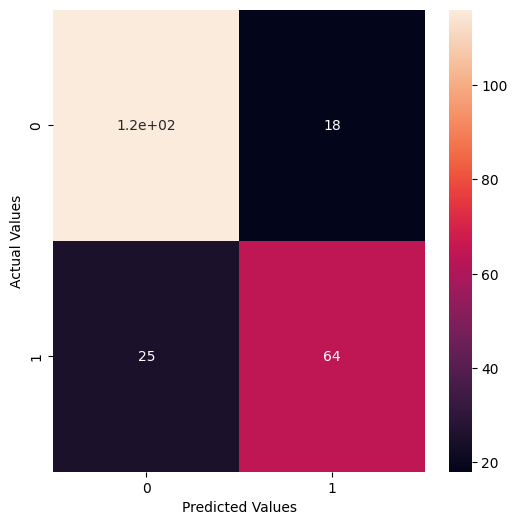

In [67]:
#Confusion matrix for Random Forest
#fig, ax = plt.subplots(figsize=(8, 8))
subb=fig.add_subplot  (2,2,i+1)
cm_plot=sns.heatmap(cm,annot=True)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

Prediction :

In [69]:
op=rf.predict([[3,1,22,1,0,7.2500,0,0,1]])
print(op)
if (op[0] == 0):
  print('Not Survived (0)')
else:
  print('Survived')

[0]
Not Survived (0)


In [70]:
op=rf.predict([[1,0,38,1,0,71.2833,1,0,0]])
print(op)
if (op[0] == 0):
  print('Not Survived (0)')
else:
  print('Survived')
     

[1]
Survived


In [71]:
op=rf.predict([[3,1,35,0,0,8.0500,0,0,1]])
print(op)
if (op[0] == 0):
  print('Not Survived (0)')
else:
  print('Survived')

[0]
Not Survived (0)


Model dump :

In [72]:
import pickle
pickle.dump(rf, open('RF_model.pkl','wb'))

In [73]:
model_pk = pickle.load(open('RF_model.pkl','rb'))